# **CH.SC.U4CSE23239 - Decision Tree - Exercise 2**

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      go_out       1.00      1.00      1.00        46
     stay_in       1.00      1.00      1.00        44

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



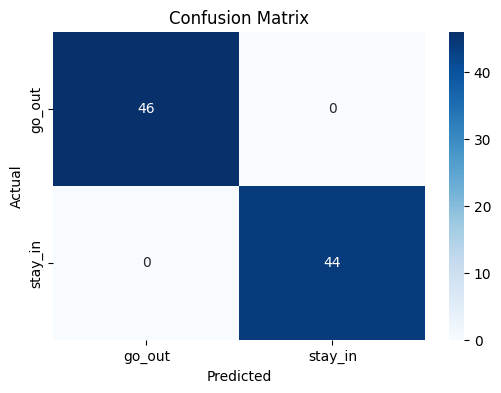

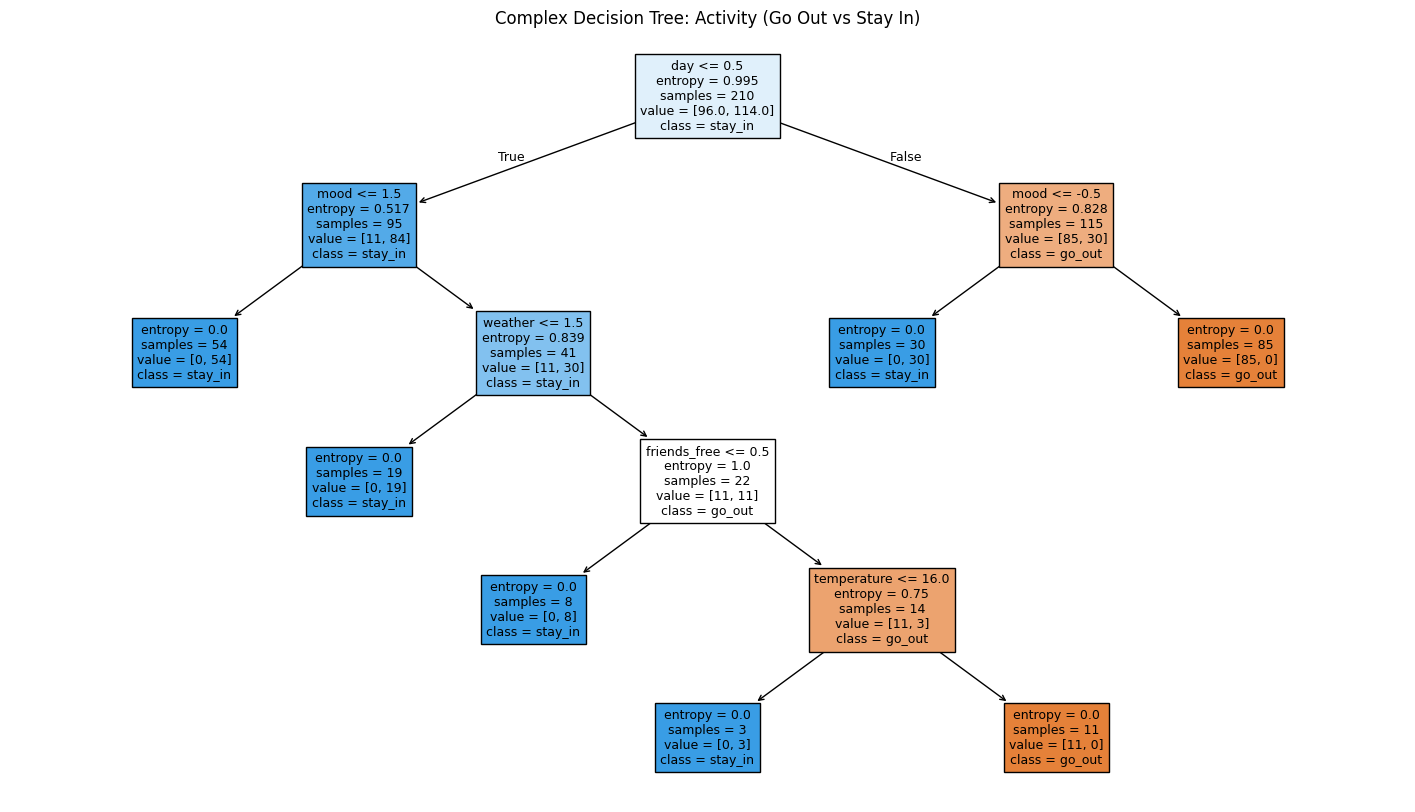

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

np.random.seed(35)

n = 300
data = {
    "weather": np.random.choice(["sunny", "rainy", "cloudy", "stormy"], n),
    "mood": np.random.choice(["happy", "tired", "excited", "sad", "neutral"], n),
    "day": np.random.choice(["weekday", "weekend"], n),
    "temperature": np.random.randint(10, 40, n),
    "friends_free": np.random.choice([0, 1], n)
}

data["activity"] = [
    "go_out" if (w in ["sunny", "cloudy"] and m in ["happy", "excited"] and f == 1 and temp > 15) or (d == "weekend" and m != "sad")
    else "stay_in"
    for w, m, d, temp, f in zip(data["weather"], data["mood"], data["day"], data["temperature"], data["friends_free"])
]

df = pd.DataFrame(data)

df["weather_encoded"] = df["weather"].map({"sunny":3, "cloudy":2, "rainy":1, "stormy":0})
df["mood_encoded"] = df["mood"].map({"happy":3, "excited":2, "neutral":1, "tired":0, "sad":-1})
df["day_encoded"] = df["day"].map({"weekday":0, "weekend":1})

X_q2 = df[["weather_encoded", "mood_encoded", "day_encoded", "temperature", "friends_free"]]
y_q2 = df["activity"]

X_train, X_test, y_train, y_test = train_test_split(X_q2, y_q2, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(18,10))
plot_tree(clf, feature_names=["weather", "mood", "day", "temperature", "friends_free"],
          class_names=clf.classes_, filled=True, fontsize=9)
plt.title("Complex Decision Tree: Activity (Go Out vs Stay In)")
plt.show()
